In [1]:
from data_gen import DataGenerator, get_data, real_u1
from pinn import PINNModel, model1, model2, optm1

from accuracy import AccuracyCalc
from plotting import NNPlots

import os

2024-10-19 22:20:38.703741: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-19 22:20:38.739589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 22:20:38.781917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 22:20:38.794268: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 22:20:38.825343: I tensorflow/core/platform/cpu_feature_guar

In [2]:
data = get_data()
koefs_list = data['big_range']
session = 7

model = PINNModel(model1(), optm=optm1())
dg = DataGenerator(data['x'], data['y'], model.predict, real_u1)
acc = AccuracyCalc(dg, (70, 70))

I0000 00:00:1729365644.764481   18743 service.cc:146] XLA service 0x7ec014016ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729365644.764558   18743 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-19 22:20:44.818101: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 58/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

I0000 00:00:1729365646.424349   18743 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [8]:
# to supress output
%%capture

existing_koefs = []
mse_loss_record = []
max_loss_record = []

output = False

for koef in koefs_list:
    if os.path.exists(DataGenerator.name(koef, session)):
        model.load(dg.name(koef, session))
        acc.update_predicitons((70, 70))

        existing_koefs.append(koef)
        max_loss_record.append(acc.maxe())
        mse_loss_record.append(acc.mse())
        if output:
            print(f'mse_loss: {mse_loss_record[-1]}')
            print(f'max_loss: {max_loss_record[-1]}')
            print()

In [4]:
import numpy as np

print(list(np.linspace(1, 1000, 112)))

[1.0, 10.0, 19.0, 28.0, 37.0, 46.0, 55.0, 64.0, 73.0, 82.0, 91.0, 100.0, 109.0, 118.0, 127.0, 136.0, 145.0, 154.0, 163.0, 172.0, 181.0, 190.0, 199.0, 208.0, 217.0, 226.0, 235.0, 244.0, 253.0, 262.0, 271.0, 280.0, 289.0, 298.0, 307.0, 316.0, 325.0, 334.0, 343.0, 352.0, 361.0, 370.0, 379.0, 388.0, 397.0, 406.0, 415.0, 424.0, 433.0, 442.0, 451.0, 460.0, 469.0, 478.0, 487.0, 496.0, 505.0, 514.0, 523.0, 532.0, 541.0, 550.0, 559.0, 568.0, 577.0, 586.0, 595.0, 604.0, 613.0, 622.0, 631.0, 640.0, 649.0, 658.0, 667.0, 676.0, 685.0, 694.0, 703.0, 712.0, 721.0, 730.0, 739.0, 748.0, 757.0, 766.0, 775.0, 784.0, 793.0, 802.0, 811.0, 820.0, 829.0, 838.0, 847.0, 856.0, 865.0, 874.0, 883.0, 892.0, 901.0, 910.0, 919.0, 928.0, 937.0, 946.0, 955.0, 964.0, 973.0, 982.0, 991.0, 1000.0]


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


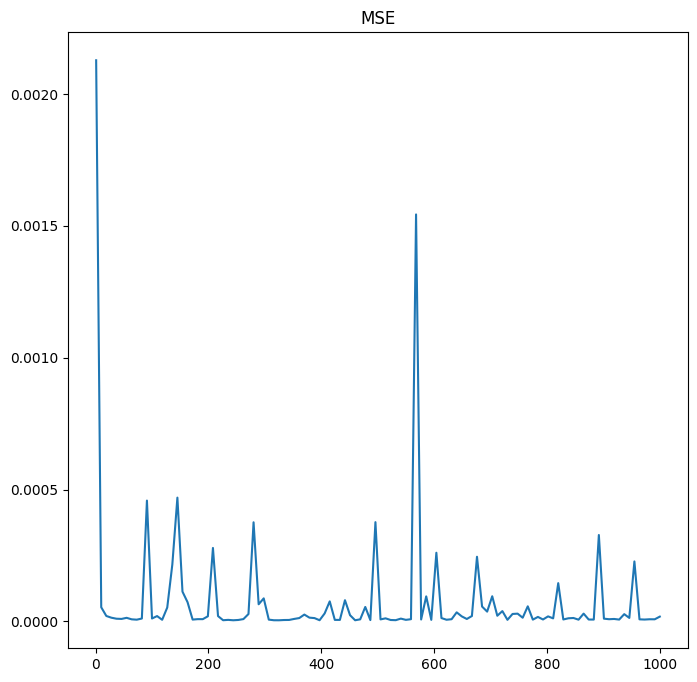

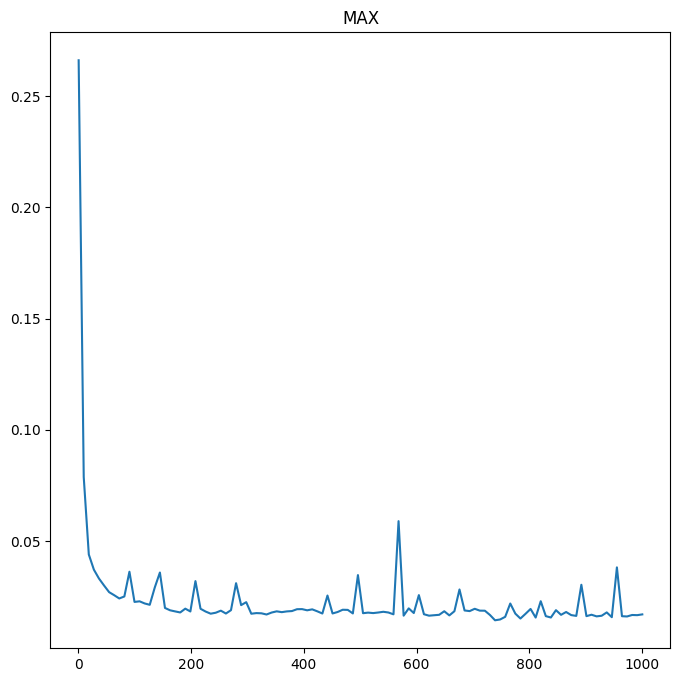

In [5]:
plotter = NNPlots(dg, (70, 70))

plotter.plot_error(existing_koefs, mse_loss_record, "MSE")
plotter.plot_error(existing_koefs, max_loss_record, "MAX")

/home/c0c0nut/Projects/PINN_Poisson/src/plotting.py:78: UserWarning: The following kwargs were not used by contour: 'linestyle'
  real.contour(
/home/c0c0nut/Projects/PINN_Poisson/src/plotting.py:99: UserWarning: The following kwargs were not used by contour: 'linestyle'
  pred.contour(
/home/c0c0nut/Projects/PINN_Poisson/src/plotting.py:129: UserWarning: The following kwargs were not used by contour: 'linestyle'
  diff.contour(


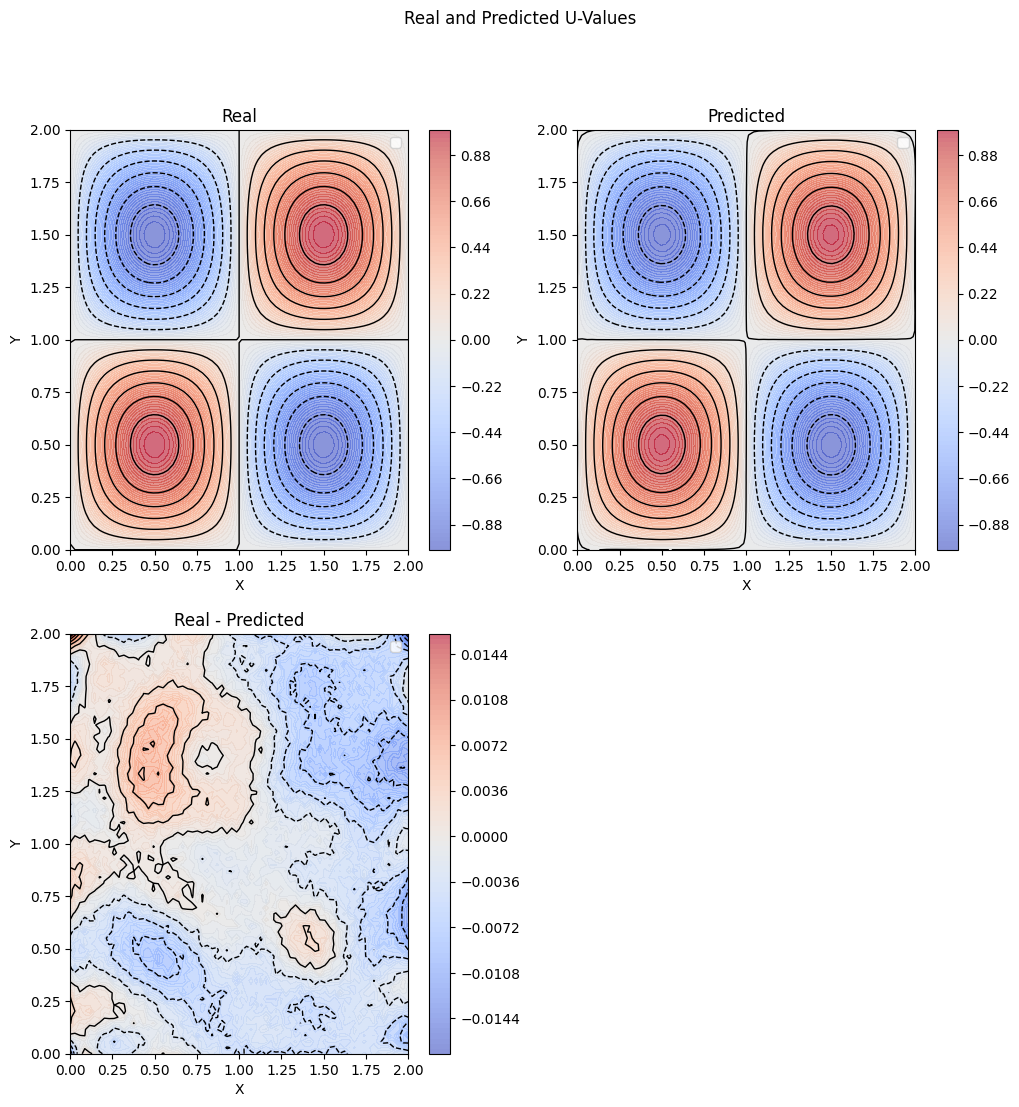

In [6]:
# plotter.plot2d_contour(color_map="gnuplot2")
plotter.plot2d_contour()